<h1 align="center">SIG731 2023: Task 3P</h1>

---

**Report Title:** Task 3P: Working with numpy Matrices (Multidimensional Data) (Unidimensional Data)  

**Author:** Shubham Singh Sehrawat  

**Student Number:** 224207934

**Email Address:** shubham512sehrawat@gmail.com

---


<h2 align="center">📈 Exploratory Data Analysis of NHANES Dataset 📉</h2> 

---

<h3 align="center">Introduction</h3>

- The National Health and Nutrition Examination Survey (NHANES) is a program conducted by the Centers for Disease Control and Prevention (CDC) to assess the health and nutritional status of adults and children in the United States. NHANES provides valuable data that is widely used for epidemiological research, public health policy development, and health promotion initiatives.

- In this notebook, we embark on an in-depth exploratory data analysis (EDA) of excerpts from the NHANES dataset, specifically focusing on body measurements of adult males and females. The dataset comprises measurements such as weight, standing height, upper arm length, upper leg length, arm circumference, hip circumference, and waist circumference. Our analysis aims to uncover insights into the distributions, relationships, and characteristics of these body measurements.

- We begin by loading the NHANES data into numpy matrices and calculate the body mass index (BMI) for each participant. Subsequently, we employ various visualization techniques, including histograms, box-and-whisker plots, and scatterplot matrices, to explore the data comprehensively. Additionally, we compute basic numerical aggregates such as measures of location (mean, median), dispersion (standard deviation, interquartile range), and shape (skewness, kurtosis) for male and female BMIs.

- Furthermore, we investigate the relationships among different body measurements for males using scatterplot matrices and compute Pearson’s and Spearman’s correlation coefficients to quantify the strength and direction of these relationships. The correlation coefficients are visualized using correlation heatmaps to facilitate interpretation and comparison.

- Overall, this EDA aims to provide a deeper understanding of the body composition and interrelationships among various body measurements in the NHANES dataset, thereby contributing to evidence-based decision-making in public health and medical research.

---

## Importing Packages




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from scipy.stats import spearmanr
from scipy.stats import skew

---
### 1. Data Loading and Preprocessing 🎢📕📖📗📚
- We download two excerpts from the NHANES dataset containing body measurements of adult males and females.
- Data is downloaded from https://github.com/gagolews/teaching-data/tree/master/marek,
- Using numpy.genfromtxt, we read the data into numpy matrices named male and female.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

male = np.genfromtxt(
    r"F:\anonymous\python\analysis\data\deakin\data_wrangling\tasks\datasets\male.csv",
    delimiter=',',
    skip_header=19          # The data starts from 19 row
)

female = np.genfromtxt(
    r"F:\anonymous\python\analysis\data\deakin\data_wrangling\tasks\datasets\female.csv",
    delimiter=',',
    skip_header=19
)

- **Shape Of data**
  - *Female*--(4221,7) i.e. 4221 rows and 7 columns
  - *Male*--(4081,7) i.e. 4081 rows and 7 columns 


- Data has 7 columns which are as follows :-
  1. Weight (kg) 
  2. Standing Height (cm)
  3. Upper Arm Length (cm)
  4. Upper Leg Length (cm)
  5. Arm Circumference (cm)
  6. Hip Circumference (cm)
  7. Waist Circumference (cm)

- Now we will add a last column at the end indicating the BMI which is calculated as follows :-

$$
\text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2}
$$




In [4]:
#BMI calculation for male and female

weights_male = male[:, 0]
heights_male = male[:, 1]
bmi_male = np.round(weights_male / ((heights_male / 100) ** 2), 2)

weights_female = female[:, 0]
heights_female = female[:, 1]
bmi_female = np.round(weights_female / ((heights_female / 100) ** 2), 2)

#Horizontal stacking the BMI column at end

male = np.hstack((male, bmi_male[:, np.newaxis])) 
female = np.hstack((female, bmi_female[:, np.newaxis]))

---

### 2. Visualization of BMI Distributions 🎢
- We create histograms of male and female BMIs on a single plot using matplotlib.pyplot.subplot.
- The histograms are configured with 20 bins, and the x-axis limits are adjusted to ensure consistency between the subfigures.
    - The limits are calculated by finding the min and max of the BMI for each male and female
    ```python

    male[:,7].min()--14
    male[:, 7].max()--67
    female[:, 7].min() --14
    female[:, 7].max() -- 67

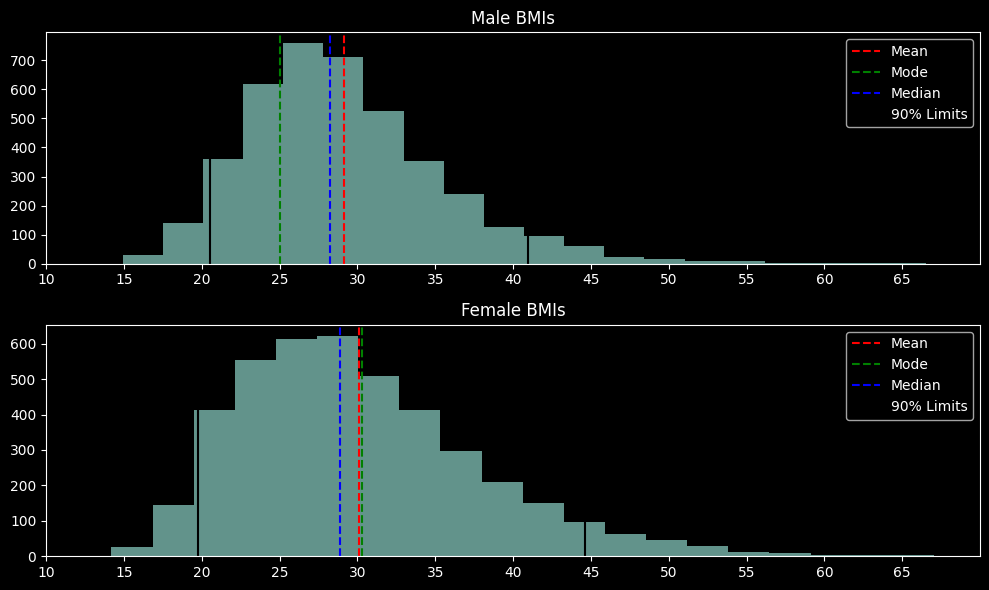

In [5]:
# Function for mode
def calculate_mode(data):
    unique, counts = np.unique(data, return_counts=True)
    mode_index = np.argmax(counts)
    return unique[mode_index]


# Defining function to calculate 90% limits
def calculate_90_limits(data):
    lower_limit = np.percentile(data, 5)
    upper_limit = np.percentile(data, 95)
    return lower_limit, upper_limit


# Calculating mean, mode, median, and 90% limits
male_mean = np.mean(male[:, 7])
male_mode = calculate_mode(male[:, 7])
male_median = np.median(male[:, 7])
male_lower_limit, male_upper_limit = calculate_90_limits(male[:, 7])

female_mean = np.mean(female[:, 7])
female_mode = calculate_mode(female[:, 7])
female_median = np.median(female[:, 7])
female_lower_limit, female_upper_limit = calculate_90_limits(female[:, 7])

# Plotting histogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(male[:, 7], bins=20, alpha=0.7)
plt.axvline(x=male_mean, color="r", linestyle="--", label="Mean")
plt.axvline(x=male_mode, color="g", linestyle="--", label="Mode")
plt.axvline(x=male_median, color="b", linestyle="--", label="Median")
plt.axvline(x=male_lower_limit, color="k", linestyle="-", label="90% Limits")
plt.axvline(x=male_upper_limit, color="k", linestyle="-")
plt.xticks(np.arange(10, 70, 5))
plt.title("Male BMIs")
plt.legend()
plt.xlim(10, 70)

plt.subplot(2, 1, 2)
plt.hist(female[:, 7], bins=20, alpha=0.7)
plt.axvline(x=female_mean, color="r", linestyle="--", label="Mean")
plt.axvline(x=female_mode, color="g", linestyle="--", label="Mode")
plt.axvline(x=female_median, color="b", linestyle="--", label="Median")
plt.axvline(x=female_lower_limit, color="k", linestyle="-", label="90% Limits")
plt.axvline(x=female_upper_limit, color="k", linestyle="-")
plt.xticks(np.arange(10, 70, 5))
plt.title("Female BMIs")
plt.legend()
plt.xlim(10, 70)

plt.tight_layout()
plt.show()

#### Observations: 🧐
- In both the male and female BMI histograms, the tails are skewed towards the right, indicating that there are relatively more individuals with higher BMI values.
- The histogram values range from 14 to 67, with the majority of the data falling between 20 and 45. This suggests that the distribution is slightly skewed towards higher BMI values, with a concentration of individuals in the middle range of BMI values.

---

### 3. Comparison of Male and Female BMIs using Box and Whisker plot
- We draw a box-and-whisker plot of male and female BMIs on a single plot for a visual comparison of the distribution of BMIs between males and females.


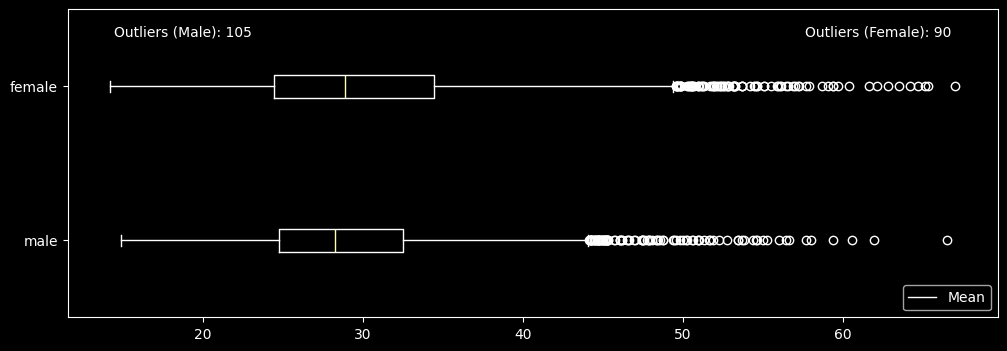

In [6]:
plt.figure(figsize=(12,4))
box = plt.boxplot(
    x=[male[:, 7], female[:, 7]],
    vert=False,
    labels=["male", "female"],
    meanline=True,
    showcaps=True,
    showbox=True,
    showmeans=False,
)

# Getting outliers count and displaying them
outliers_male = len(box["fliers"][0].get_xdata())
outliers_female = len(box["fliers"][1].get_xdata())

plt.text(
    0.05,
    0.95,
    f"Outliers (Male): {outliers_male}",
    transform=plt.gca().transAxes,
    ha="left",
    va="top",
)
plt.text(
    0.95,
    0.95,
    f"Outliers (Female): {outliers_female}",
    transform=plt.gca().transAxes,
    ha="right",
    va="top",
)

plt.legend(["Mean"], loc="lower right")
plt.show()

#### Observation 🧐
**Male:**
- Outliers: 105
- Observation: The distribution exhibits a long right tail with outliers primarily located on the right side. The mean is not centered but slightly shifted towards the left, indicating asymmetry in the distribution. The left tail of the distribution is smaller compared to the right tail.

**Female:**
- Outliers: 90
- Observation: Similar to the male distribution, the female distribution also shows a long right tail with outliers predominantly on the right side. The mean is slightly shifted towards the left, and the left tail is smaller compared to the right tail, suggesting a similar asymmetry in the distribution.

---


### 4. Numerical Aggregates of Male and Female BMIs
- We compute basic numerical aggregates such as mean, median, standard deviation, interquartile range, skewness, and kurtosis for male and female BMIs.
- The aggregates are reported in a readable format for easy interpretation.


In [7]:
def calculate_stats(data):
    mean_ = np.mean(data)
    median_ = np.median(data)
    min_ = np.min(data)
    max_ = np.max(data)
    std_ = np.std(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr_ = q3 - q1
    skew_ = skew(data)
    return mean_, median_, min_, max_, std_, q1, q3, iqr_, skew_


male_stats = calculate_stats(male[:, 7])
female_stats = calculate_stats(female[:, 7])


#### Results and Observations 🧐

<div style="float: left; width: 63%;">
    
- **Mean:** The mean value for males is slightly lower than for females, indicating that, on average, males have lower values in the dataset compared to females.
- **Median:** Similarly, the median value for males is slightly lower than for females, suggesting that the central tendency of the male data distribution is slightly lower than that of females.
- **Minimum and Maximum:** The minimum and maximum values for males and females are close to each other, with slight differences indicating that both groups have similar ranges of values.
- **Standard Deviation:** The standard deviation for females is higher than for males, indicating that the data points in the female distribution are more spread out from the mean compared to the male distribution.
- **Quartiles (Q1 and Q3):** The quartile values (Q1 and Q3) for females are higher than for males, indicating that the interquartile range (IQR) for females is larger, which further supports the observation of greater dispersion in the female distribution.
- **Skewness:** Both distributions are positively skewed, with skewness values close to each other. This suggests that both datasets have a tail on the right side of the distribution, but the male distribution has a slightly higher skewness value, indicating a slightly more pronounced tail.

</div>

<div style="float: right; width: 35%;">

| Statistic    | Male            | Female          |
|--------------|-----------------|-----------------|
| Mean         | 29.14           | 30.10           |
| Median       | 28.27           | 28.89           |
| Minimum      | 14.91           | 14.20           |
| Maximum      | 66.50           | 67.04           |
| Standard Deviation | 6.31      | 7.76            |
| 1st Quartile (Q1) | 24.79      | 24.46           |
| 3rd Quartile (Q3) | 32.52      | 34.47           |
| Interquartile Range (IQR) | 7.73 | 10.01         |
| Skewness     | 0.97            | 0.92            |

</div>


---

---
### 5. Scatterplot Matrix for Male Body Measurements
- Constructing a scatterplot matrix for male heights, weights, waist circumferences, hip circumferences, and BMIs.
- This matrix visualizes the relationships among different body measurements for males.


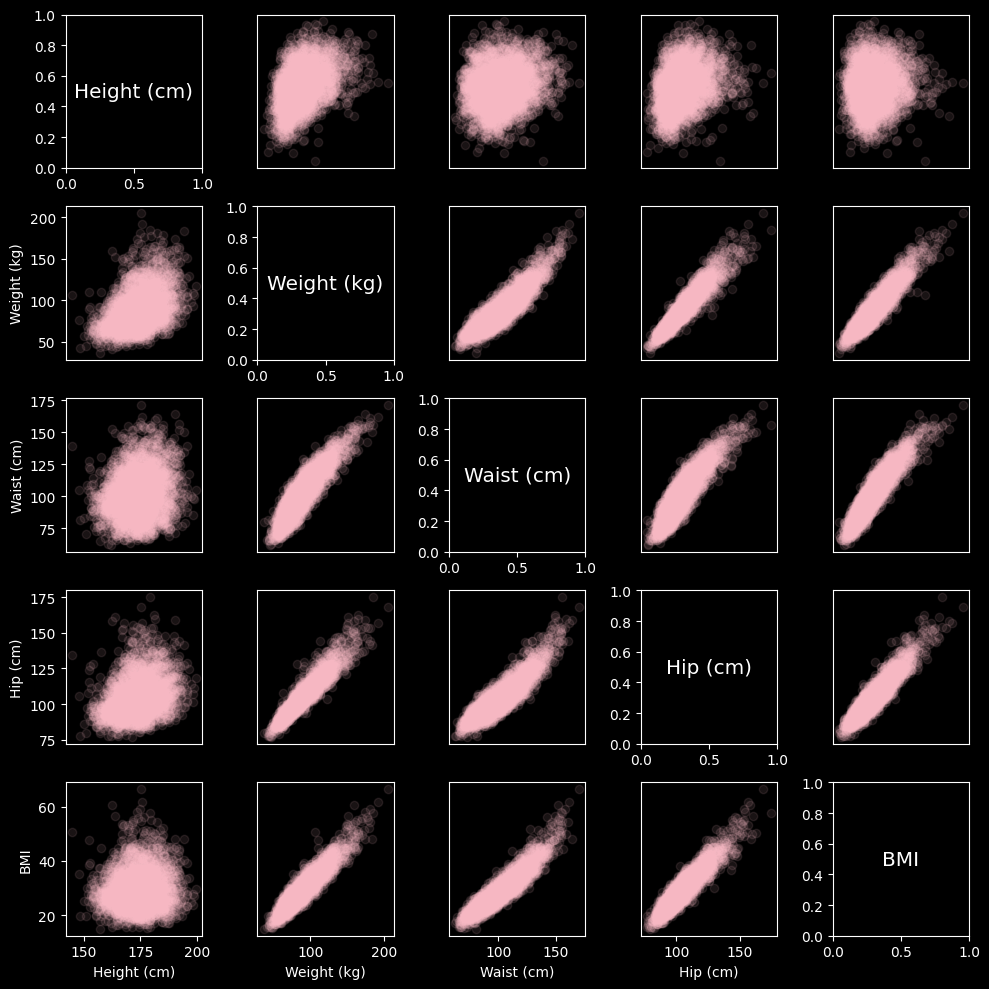

In [8]:
# Pairplot Function

def pairplot(X, labels, bins=21, alpha=0.1):

    assert X.shape[1] == len(labels)

    k = X.shape[1]

    fig, axes = plt.subplots(nrows=k, ncols=k, figsize=(10, 10))

    for i in range(k):

        for j in range(k):

            if i == j:  # diagonal

                axes[i, j].text(

                    0.5,

                    0.5,
                    labels[i],

                    transform=axes[i, j].transAxes,

                    ha="center",

                    va="center",

                    size="x-large",
                )

            else:

                axes[i, j].scatter(X[:, j], X[:, i], color="pink", alpha=alpha)

                # Only showing labels on the leftmost and bottommost axes

                if i == k - 1:  # x-axis label

                    axes[i, j].set_xlabel(labels[j])

                else:

                    axes[i, j].set_xticks([])

                if j == 0:  # y-axis label

                    axes[i, j].set_ylabel(labels[i])

                else:

                    axes[i, j].set_yticks([])

    plt.tight_layout()

    plt.show()



X = male[:, [1, 0, 6, 5, 7]]

labels = ["Height (cm)", "Weight (kg)", "Waist (cm)", "Hip (cm)", "BMI"]


pairplot(X, labels)

### 6. Correlation Analysis
- We compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables mentioned in the scatterplot matrix.
- The correlation coefficients are presented and visualized on two correlation heatmaps, with coefficients printed inside the colored cells.




C:\Users\Anonymous\AppData\Local\Temp\ipykernel_10524\2426349013.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


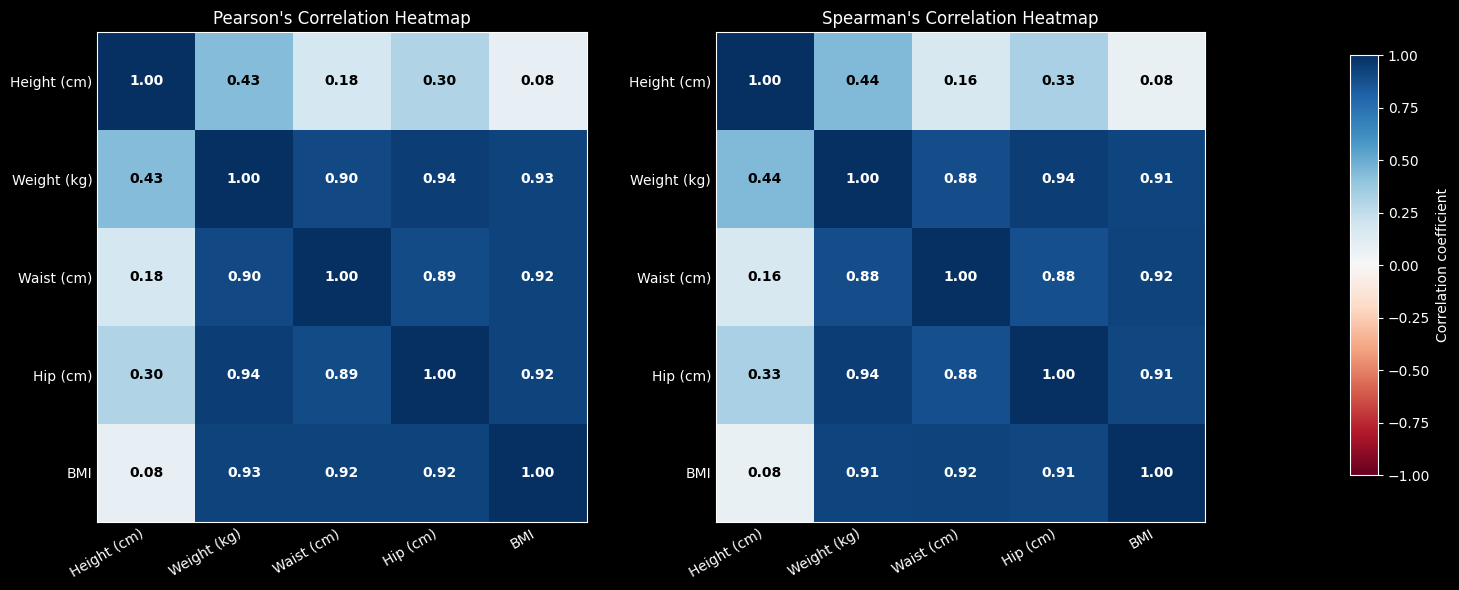

In [9]:
#Heatmap function

def pearson_spearman_heatmap(X, labels):
    """
    Draws Pearson's and Spearman's correlation heatmaps side by side, given:
    * X - dataset (numpy array),
    * labels - list of column names
    """
    assert X.ndim == 2 and X.shape[1] == len(
        labels
    ), "Input X must be a 2D array with matching labels"

    # Calculating Pearson's correlation matrix
    pearson_corr = np.corrcoef(X, rowvar=False)

    # Calculating Spearman's correlation matrix
    spearman_corr = np.zeros_like(pearson_corr)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            spearman_corr[i, j] = spearmanr(X[:, i], X[:, j])[0]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    for i, (corr, method) in enumerate(
        zip([pearson_corr, spearman_corr], ["Pearson", "Spearman"])
    ):
        ax = axes[i]
        im = ax.imshow(corr, cmap=plt.get_cmap("RdBu"), vmin=-1, vmax=1)
        ax.set_title(f"{method}'s Correlation Heatmap")
        ax.set_xticks(np.arange(X.shape[1]))
        ax.set_yticks(np.arange(X.shape[1]))
        ax.set_xticklabels(labels, rotation=30, ha="right")
        ax.set_yticklabels(labels)
        ax.tick_params(axis="both", which="both", length=0)
        ax.grid(False)
        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                ax.text(
                    j,
                    i,
                    f"{corr[i, j]:.2f}",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black" if np.abs(corr[i, j]) < 0.5 else "white",
                )

    cbar_ax = fig.add_axes([0.98, 0.20, 0.02, 0.7])  # [left, bottom, width, height]
    fig.colorbar(
        im, cax=cbar_ax, orientation="vertical", label="Correlation coefficient"
    )

    plt.tight_layout()
    plt.subplots_adjust(right=0.9)  # Adjusting subplot spacing
    plt.show()


X = male[:, [1, 0, 6, 5, 7]]  # Dataset
labels = ["Height (cm)", "Weight (kg)", "Waist (cm)", "Hip (cm)", "BMI"]

pearson_spearman_heatmap(X, labels)

### 7. Discussion of Findings 🧐
- We interpret the results obtained from the analysis, discussing the distributions, relationships, and correlations among various body measurements.
- Insights are drawn regarding differences between male and female body compositions, as well as the strength and direction of relationships among body measurements.

| Variables            | Pairplot Results        | Pearson's Correlation | Spearman's Correlation | Interpretation                                                                                                                                                          |
|----------------------|----------------------|-----------------------|-------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Height (cm) vs. Weight (kg) |   Nonlinear trend                   | 0.434                 | 0.439                   | People generally tend to be heavier when taller, but it's not a perfect relationship; some tall people are light, and some short people are heavy.                                 |
| Height (cm) vs. Waist (cm)  |   Nonlinear trend                   | 0.176                 | 0.163                   | Taller individuals might have slightly larger waistlines on average, but the connection isn't very strong or straightforward.                        |
| Height (cm) vs. Hip (cm)    |   Nonlinear trend                   | 0.302                 | 0.326                   | There's a tendency for taller people to have somewhat wider hips, but it's not a strict rule; some short individuals might have wider hips too.                                 |
| Height (cm) vs. BMI         |   Nonlinear trend                   | 0.080                 | 0.075                   | Height doesn't strongly predict BMI; there are tall and short people across the BMI spectrum. The relationship is complex and not easily summarized.            |
| Weight (kg) vs. Waist (cm)  |   Strong positive trend                   | 0.898                 | 0.884                   | As people get heavier, their waistlines tend to expand. This connection is quite noticeable and consistent.                          |
| Weight (kg) vs. Hip (cm)    |   Strong positive trend                   | 0.930                 | 0.944                   | Heavier individuals often have wider hips. This relationship is quite clear and reliable.                            |
| Weight (kg) vs. BMI         |  Strong positive trend                    | 0.929                 | 0.915                   | Higher weight tends to correlate with higher BMI. This pattern is quite evident and expected.                                        |
| Waist (cm) vs. Hip (cm)     |  Strong positive trend                    | 0.895                 | 0.880                   | People with larger waistlines often have wider hips. This connection is noticeable and consistent.         |
| Waist (cm) vs. BMI          |  Strong positive trend                    | 0.924                 | 0.922                   | People with larger waistlines tend to have higher BMIs. This relationship is clear and expected.                          |
| Hip (cm) vs. BMI            |  Strong positive trend                    | 0.925                 | 0.906                   | Wider hips often coincide with higher BMIs. This connection is quite evident.                            |


# References 📚

1. Python Official Website: [Python.org](https://www.python.org/)
2. Numpy Official Website: [Numpy.org](https://numpy.org/)
3. Scipy Official Website: [Scipy.org](https://www.scipy.org/)
4. Matplotlib Official Website: [Matplotlib.org](https://matplotlib.org/)
5. ChatGPT Information: [OpenAI](https://openai.com/)
6. Gagolewski, M. (2024). *Minimalist Data Wrangling with Python*. Melbourne. DOI: [10.5281/zenodo.6451068](https://doi.org/10.5281/zenodo.6451068). ISBN: 978-0-6455719-1-2. URL: [Data Wrangling with Python](https://datawranglingpy.gagolewski.com/)
7. Gagolewski, M. [Minimalist Data Wrangling with Python](https://github.com/gagolews). GitHub Repository.
8. NHANES Dataset: [National Health and Nutrition Examination Survey (NHANES)](https://github.com/gagolews/teaching-data/tree/master/marek)

